# **재무데이터 ANOVA 분산검정**
분산검정 ANOVA 검정 후 평균검정T-test 진행 


<span style="color:skyblue">**등분산검정으로 두 독립변수 분산 동일성 검증 (ANOVA)**</span><br>
귀무가설 H0 집단간 분산 같다 -> 등분산 -> Student's t-test <br>
대립가설 H1 집단간 분산 다르다 -> 이분산 -> Welch's t-test


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from scipy import stats
from statsmodels.multivariate.manova import MANOVA

In [2]:
df = pd.read_csv(r'C:\Users\qorwl\Desktop\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\finaldataset_ver7.5.csv', index_col=0)

In [3]:
df

,회사명,거래소코드,회계년도,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,...,출자목적_투자,출자목적_경영권,출자목적_영업이익,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도
0,(주)CMG제약,58820,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,2000,588202001,0.0
1,(주)CMG제약,58820,2001/12,141.01,19.89,131.99,51.76,22.76,137.88,50.60,...,0.0,0.0,0.0,0.0,0.00,1420.0,-0.633803,2001,588202002,0.0
2,(주)CMG제약,58820,2002/12,114.21,16.60,132.37,84.50,7.98,135.68,53.16,...,0.0,0.0,0.0,0.0,0.00,520.0,-0.633803,2002,588202003,0.0
3,(주)CMG제약,58820,2003/12,185.63,23.55,71.46,39.31,35.58,71.96,29.13,...,0.0,0.0,0.0,0.0,0.00,800.0,0.538462,2003,588202004,0.0
4,(주)CMG제약,58820,2004/12,149.73,17.11,101.56,50.23,24.97,102.30,29.59,...,0.0,0.0,0.0,0.0,0.00,550.0,-0.312500,2004,588202005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060,2016/12,411.65,341.54,5.19,93.01,14.15,14.40,7.58,...,0.0,0.0,0.0,0.0,0.97,3425.0,0.126645,2016,240602017,0.0
26828,흥구석유(주),24060,2017/12,177.50,146.69,12.83,91.80,8.68,14.56,7.51,...,0.0,0.0,0.0,0.0,0.03,2775.0,-0.189781,2017,240602018,0.0
26829,흥구석유(주),24060,2018/12,329.17,290.09,5.40,89.00,11.59,6.76,0.00,...,0.0,0.0,0.0,0.0,1.73,2705.0,-0.025225,2018,240602019,0.0
26830,흥구석유(주),24060,2019/12,485.39,422.76,6.05,79.27,21.47,8.65,0.00,...,0.0,0.0,0.0,0.0,0.56,5360.0,0.981516,2019,240602020,0.0


## **분산 검정 (ANOVA)**
<br>
등분산성: 분산분석(ANOVA)을 통해 서로 다른 두개 이상의 집단을 비교하고자 할때, <br>
기본적으로 해당 집단들이 만족해야되는 조건 중 한가지로 분산이 같음을 의미<br>

<span style="color:skyblue">**Levene 등분산검정으로 두 독립변수 분산 동일성 검증 (ANOVA)**</span><br>
귀무가설 H0 집단간 분산 같다 -> 등분산 -> Student's t-test <br>
대립가설 H1 집단간 분산 다르다 -> 이분산 -> Welch's t-test

### two way ANOVA F검정 이원분산분석
해당 데이터는 종속변수(y)가 '부도' 하나임으로 단일변량판별분석 중 다수의 독립변수로 분석하는 이원분산분석 시행<br><br>
F검정 시 특수문자(_제외)와 숫자가 칼럼 첫번째 문자열이면 에러떠서 _로 변경 필요<br>
<br>
p-value 0.05 이하이면 귀무가설 기각 대립가설 채택하여 **이분산** t-test 진행<br>
p-value 0.05 이상이면 귀무가설 채택 대립가설 기각하여 **등분산** t-test 진행<br>

In [4]:
from pandas import DataFrame
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
# #칼럼 전체보기
# pd.set_option('display.max_seq_items', None)

In [6]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도'],
      dtype='object'

In [7]:
# 독립변수 +로 연결지어줌
'+'.join(df.columns)

'회사명+거래소코드+회계년도+유동비율+당좌비율+유동부채비율+비유동비율+순운전자본비율+부채비율+차입금의존도+비유동장기적합률+매출채권_대_매입채무비율+자기자본순이익률+총자본순이익률+자기자본영업이익률+총자본영업이익률+경영자본순이익률+경영자본영업이익률+매출액순이익률+금융비용부담률+매출액영업이익률+당좌자산회전률+재고자산회전률+자기자본회전률+경영자본회전률+비유동자산회전률+매출채권회전률+매입채무회전률+유형자산회전율+설비투자효율+총자본투자효율+자기자본증가율+매출액증가율+영업이익증가율+순이익증가율+유형자산증가율+유동자산증가율+EBITDA_매출액+부채구성비율+청산가치율+이익잉여금비율+자본잉여금비율+경영자산비율+이자보상비율+매출액판관비율+매출원가율+부가가치율+재고자산보유기간+매출채권회수기간+매입채무지급기간+EBITDA이자보상비율+EBITDA유동부채비율+EBITDA단기차입비율+EBITDA총자산비율+EBITDA총부채비율+영업이익대비영업현금흐름비율+영업이익대비EBITDA비율+자기자본배당률+금융비용_대_부채비율+자기자본배율+누적수익성비율+총자산영업이익률+총자산회전율+정기공시제목+수시공시제목+대표이사_변경+최대주주_변경+회계처리위반+횡령배임+신종채권+영업조업중단+출자목적_투자+출자목적_경영권+출자목적_영업이익+기타+외국인_주식분포비율+종가+종가변동률+년+key+부도'

In [8]:
#(종속변수 ~ 독립변수1 + 독립변수2 + ... + 독립변수n)
factor = "부도 ~ 유동비율+당좌비율+유동부채비율+비유동비율+순운전자본비율+부채비율+차입금의존도+비유동장기적합률+매출채권_대_매입채무비율+자기자본순이익률+총자본순이익률+자기자본영업이익률+총자본영업이익률+경영자본순이익률+경영자본영업이익률+매출액순이익률+금융비용부담률+매출액영업이익률+당좌자산회전률+재고자산회전률+자기자본회전률+경영자본회전률+비유동자산회전률+매출채권회전률+매입채무회전률+유형자산회전율+설비투자효율+총자본투자효율+자기자본증가율+매출액증가율+영업이익증가율+순이익증가율+유형자산증가율+유동자산증가율+EBITDA_매출액+부채구성비율+청산가치율+이익잉여금비율+자본잉여금비율+경영자산비율+이자보상비율+매출액판관비율+매출원가율+부가가치율+재고자산보유기간+매출채권회수기간+매입채무지급기간+EBITDA이자보상비율+EBITDA유동부채비율+EBITDA단기차입비율+EBITDA총자산비율+EBITDA총부채비율+영업이익대비영업현금흐름비율+영업이익대비EBITDA비율+자기자본배당률+금융비용_대_부채비율+자기자본배율+누적수익성비율+총자산영업이익률+총자산회전율"
fit = ols(factor, data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
유동비율,1.0,0.002339,0.002339,0.181264,6.702925e-01
당좌비율,1.0,1.061371,1.061371,82.269703,1.266514e-19
유동부채비율,1.0,2.074816,2.074816,160.824576,9.533822e-37
비유동비율,1.0,1.322090,1.322090,102.478787,4.817341e-24
순운전자본비율,1.0,12.794550,12.794550,991.740038,8.925891e-214
...,...,...,...,...,...
자기자본배율,1.0,0.000187,0.000187,0.014498,9.041605e-01
누적수익성비율,1.0,0.586679,0.586679,45.475033,1.577406e-11
총자산영업이익률,1.0,0.068627,0.068627,5.319473,2.109599e-02
총자산회전율,1.0,0.002430,0.002430,0.188328,6.643155e-01


In [9]:
result_ = pd.DataFrame(anova_lm(fit))
result_

,df,sum_sq,mean_sq,F,PR(>F)
유동비율,1.0,0.002339,0.002339,0.181264,6.702925e-01
당좌비율,1.0,1.061371,1.061371,82.269703,1.266514e-19
유동부채비율,1.0,2.074816,2.074816,160.824576,9.533822e-37
비유동비율,1.0,1.322090,1.322090,102.478787,4.817341e-24
순운전자본비율,1.0,12.794550,12.794550,991.740038,8.925891e-214
...,...,...,...,...,...
자기자본배율,1.0,0.000187,0.000187,0.014498,9.041605e-01
누적수익성비율,1.0,0.586679,0.586679,45.475033,1.577406e-11
총자산영업이익률,1.0,0.068627,0.068627,5.319473,2.109599e-02
총자산회전율,1.0,0.002430,0.002430,0.188328,6.643155e-01


In [10]:
result_.loc[result_['PR(>F)'] > 0.05, 't-test'] = '등분산' #homo
result_.loc[result_['PR(>F)'] < 0.05, 't-test'] = '이분산' #hetero

In [11]:
result_

,df,sum_sq,mean_sq,F,PR(>F),t-test
유동비율,1.0,0.002339,0.002339,0.181264,6.702925e-01,등분산
당좌비율,1.0,1.061371,1.061371,82.269703,1.266514e-19,이분산
유동부채비율,1.0,2.074816,2.074816,160.824576,9.533822e-37,이분산
비유동비율,1.0,1.322090,1.322090,102.478787,4.817341e-24,이분산
순운전자본비율,1.0,12.794550,12.794550,991.740038,8.925891e-214,이분산
...,...,...,...,...,...,...
자기자본배율,1.0,0.000187,0.000187,0.014498,9.041605e-01,등분산
누적수익성비율,1.0,0.586679,0.586679,45.475033,1.577406e-11,이분산
총자산영업이익률,1.0,0.068627,0.068627,5.319473,2.109599e-02,이분산
총자산회전율,1.0,0.002430,0.002430,0.188328,6.643155e-01,등분산


In [12]:
#result_ = result_.drop(columns=['p-value'])

In [13]:
result_['t-test'].value_counts()

이분산    34
등분산    26
Name: t-test, dtype: int64

# ['회사명','거래소코드','회계년도','년','key'] drop

In [14]:
subset = df.drop(columns = ['회사명','거래소코드','회계년도','년','key', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률'])

In [15]:
subset

,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율,부도
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.022311,0.000000,0.00,0.019074,179.37,0.189100,0.052949,1.761228,0.0
1,141.01,19.89,131.99,51.76,22.76,137.88,50.60,48.88,2.25,1.26,...,0.000000,-0.014006,0.000000,0.00,0.023517,179.37,0.005261,0.014062,0.756792,0.0
2,114.21,16.60,132.37,84.50,7.98,135.68,53.16,81.79,10.12,-29.43,...,0.000000,-0.248436,0.000000,0.00,0.043081,133.37,-0.139212,-0.247841,1.713785,0.0
3,185.63,23.55,71.46,39.31,35.58,71.96,29.13,39.12,6.83,1.70,...,0.000000,-0.084541,0.000000,0.00,0.058531,131.30,-0.203019,-0.082618,1.571816,0.0
4,149.73,17.11,101.56,50.23,24.97,102.30,29.59,49.86,95.41,-86.13,...,0.000000,-2.425973,0.000000,0.00,0.047346,52.25,-1.181502,-0.547982,2.526356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,411.65,341.54,5.19,93.01,14.15,14.40,7.58,85.17,0.00,3.17,...,13.539357,0.086380,71.485777,2.10,0.012651,4611.84,0.414800,0.012181,1.817620,0.0
26828,177.50,146.69,12.83,91.80,8.68,14.56,7.51,90.23,10241.82,2.97,...,11.297106,0.048203,65.443201,2.08,0.012502,4650.29,0.417422,0.009398,1.946103,0.0
26829,329.17,290.09,5.40,89.00,11.59,6.76,0.00,87.80,139592.04,3.38,...,30.480579,0.021654,75.217490,2.48,0.018056,4696.15,0.453302,0.014520,2.210036,0.0
26830,485.39,422.76,6.05,79.27,21.47,8.65,0.00,77.27,53375.77,11.25,...,15.153904,0.068548,49.640822,2.83,0.000300,5133.42,0.485889,0.005988,1.800947,0.0


In [16]:
subset.columns[:-1]

Index(['유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도',
       '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률',
       '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률', '매출액영업이익률',
       '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '매출채권회전률',
       '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율', '매출액증가율',
       '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액', '부채구성비율',
       '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율', '매출원가율',
       '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율'],
      dtype='object')

In [17]:
#결과 result df로 생성
result = pd.DataFrame([subset.columns[:-1], result_['F'],result_['PR(>F)'], result_['t-test']])
result

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율,NaN
1,0.181264,82.269703,160.824576,102.478787,991.740038,48.045193,126.777719,45.372585,1.772731,266.657215,...,8.553838,6.863698,27.38573,0.068972,3.71481,0.014498,45.475033,5.319473,0.188328,NaN
2,0.670292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183056,0.0,...,0.003451,0.008801,0.0,0.792842,0.053942,0.90416,0.0,0.021096,0.664315,NaN
3,등분산,이분산,이분산,이분산,이분산,이분산,이분산,이분산,등분산,이분산,...,이분산,이분산,이분산,등분산,등분산,등분산,이분산,이분산,등분산,NaN


In [18]:
#칼럼명 지정 및 0행에서 제거
result = result.rename(columns = result.iloc[0])
result = result.drop(result.index[0])
result

,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율,NaN
1,0.181264,82.269703,160.824576,102.478787,991.740038,48.045193,126.777719,45.372585,1.772731,266.657215,...,8.553838,6.863698,27.38573,0.068972,3.71481,0.014498,45.475033,5.319473,0.188328,NaN
2,0.670292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183056,0.0,...,0.003451,0.008801,0.0,0.792842,0.053942,0.90416,0.0,0.021096,0.664315,NaN
3,등분산,이분산,이분산,이분산,이분산,이분산,이분산,이분산,등분산,이분산,...,이분산,이분산,이분산,등분산,등분산,등분산,이분산,이분산,등분산,NaN


In [19]:
#마지막 칼럼 Residual 제거
result=result.iloc[:, 0:60]
result

,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총자산비율,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율
1,0.181264,82.269703,160.824576,102.478787,991.740038,48.045193,126.777719,45.372585,1.772731,266.657215,...,116.35424,8.553838,6.863698,27.38573,0.068972,3.71481,0.014498,45.475033,5.319473,0.188328
2,0.670292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183056,0.0,...,0.0,0.003451,0.008801,0.0,0.792842,0.053942,0.90416,0.0,0.021096,0.664315
3,등분산,이분산,이분산,이분산,이분산,이분산,이분산,이분산,등분산,이분산,...,이분산,이분산,이분산,이분산,등분산,등분산,등분산,이분산,이분산,등분산


In [20]:
#이름 변경
result.rename(index={1 : 'F', 2 : 'PR(>F)', 3: 't-test'}, inplace = True)

In [21]:
#최종 result 완성
#등분산    
#이분산     
result

,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,자기자본순이익률,...,EBITDA총자산비율,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,누적수익성비율,총자산영업이익률,총자산회전율
F,0.181264,82.269703,160.824576,102.478787,991.740038,48.045193,126.777719,45.372585,1.772731,266.657215,...,116.35424,8.553838,6.863698,27.38573,0.068972,3.71481,0.014498,45.475033,5.319473,0.188328
PR(>F),0.670292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183056,0.0,...,0.0,0.003451,0.008801,0.0,0.792842,0.053942,0.90416,0.0,0.021096,0.664315
t-test,등분산,이분산,이분산,이분산,이분산,이분산,이분산,이분산,등분산,이분산,...,이분산,이분산,이분산,이분산,등분산,등분산,등분산,이분산,이분산,등분산


In [22]:
resultt = result.T

In [23]:
resultt

,F,PR(>F),t-test
유동비율,0.181264,0.670292,등분산
당좌비율,82.269703,0.0,이분산
유동부채비율,160.824576,0.0,이분산
비유동비율,102.478787,0.0,이분산
순운전자본비율,991.740038,0.0,이분산
부채비율,48.045193,0.0,이분산
차입금의존도,126.777719,0.0,이분산
비유동장기적합률,45.372585,0.0,이분산
매출채권_대_매입채무비율,1.772731,0.183056,등분산
자기자본순이익률,266.657215,0.0,이분산


## T-test 
ANOMA에서 등분산 검증을 거쳐 분산 형태별로 t-test 진행 <br><br>
귀무가설 H0 집단간 분산 같다 -> 등분산 -> Student's t-test------equal_var = True <br>
대립가설 H1 집단간 분산 다르다 -> 이분산 -> Welch's t-test------equal_var = False
<br><br>
등분산   26<br>
이분산   34<br>


### 이분산 Welch's t-test / equal_var = False

In [24]:
#이분산 feature만 추출
resultt[resultt['t-test']=='이분산']

,F,PR(>F),t-test
당좌비율,82.269703,0.0,이분산
유동부채비율,160.824576,0.0,이분산
비유동비율,102.478787,0.0,이분산
순운전자본비율,991.740038,0.0,이분산
부채비율,48.045193,0.0,이분산
차입금의존도,126.777719,0.0,이분산
비유동장기적합률,45.372585,0.0,이분산
자기자본순이익률,266.657215,0.0,이분산
총자본순이익률,1332.995245,0.0,이분산
자기자본영업이익률,5.971672,0.014544,이분산


In [25]:
#칼럼 리스트 지정
print(resultt[resultt['t-test']=='이분산'].index.shape)
resultt[resultt['t-test']=='이분산'].index
hetero_col = resultt[resultt['t-test']=='이분산'].index.tolist()
hetero_col

(34,)


['당좌비율',
 '유동부채비율',
 '비유동비율',
 '순운전자본비율',
 '부채비율',
 '차입금의존도',
 '비유동장기적합률',
 '자기자본순이익률',
 '총자본순이익률',
 '자기자본영업이익률',
 '총자본영업이익률',
 '경영자본순이익률',
 '경영자본영업이익률',
 '매출액순이익률',
 '매출액영업이익률',
 '당좌자산회전률',
 '경영자본회전률',
 '비유동자산회전률',
 '총자본투자효율',
 'EBITDA_매출액',
 '부채구성비율',
 '청산가치율',
 '이익잉여금비율',
 '경영자산비율',
 '매출원가율',
 '부가가치율',
 '매출채권회수기간',
 'EBITDA유동부채비율',
 'EBITDA총자산비율',
 'EBITDA총부채비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '누적수익성비율',
 '총자산영업이익률']

In [26]:
hetero_col.append('부도')
hetero_col_ = resultt[resultt['t-test']=='이분산'].index.tolist()

In [27]:
welch = df[hetero_col]
print('welch shape : ',welch.shape)
print('부도 value_counts : \n', welch['부도'].value_counts())
welch

welch shape :  (26832, 35)
부도 value_counts : 
 0.0    26430
1.0      402
Name: 부도, dtype: int64


,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,자기자본순이익률,총자본순이익률,자기자본영업이익률,...,부가가치율,매출채권회수기간,EBITDA유동부채비율,EBITDA총자산비율,EBITDA총부채비율,영업이익대비영업현금흐름비율,영업이익대비EBITDA비율,누적수익성비율,총자산영업이익률,부도
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.022311,0.000000,0.189100,0.052949,0.0
1,19.89,131.99,51.76,22.76,137.88,50.60,48.88,1.26,0.53,3.35,...,11.572205,0.330886,0.000000,0.000000,0.000000,-0.014006,0.000000,0.005261,0.014062,0.0
2,16.60,132.37,84.50,7.98,135.68,53.16,81.79,-29.43,-12.42,-49.82,...,0.460256,0.280767,0.000000,0.000000,0.000000,-0.248436,0.000000,-0.139212,-0.247841,0.0
3,23.55,71.46,39.31,35.58,71.96,29.13,39.12,1.70,0.83,-14.10,...,10.688194,1.027041,0.000000,0.000000,0.000000,-0.084541,0.000000,-0.203019,-0.082618,0.0
4,17.11,101.56,50.23,24.97,102.30,29.59,49.86,-86.13,-47.69,-63.12,...,-15.018419,1.463160,0.000000,0.000000,0.000000,-2.425973,0.000000,-1.181502,-0.547982,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,341.54,5.19,93.01,14.15,14.40,7.58,85.17,3.17,2.77,1.40,...,4.861952,12.281292,37.521425,1.704032,13.539357,0.086380,71.485777,0.414800,0.012181,0.0
26828,146.69,12.83,91.80,8.68,14.56,7.51,90.23,2.97,2.60,1.08,...,4.521229,13.463667,12.827632,1.436030,11.297106,0.048203,65.443201,0.417422,0.009398,0.0
26829,290.09,5.40,89.00,11.59,6.76,0.00,87.80,3.38,3.06,1.56,...,4.436321,11.770397,38.184903,1.930418,30.480579,0.021654,75.217490,0.453302,0.014520,0.0
26830,422.76,6.05,79.27,21.47,8.65,0.00,77.27,11.25,10.44,0.68,...,10.003876,11.583624,21.657725,1.206357,15.153904,0.068548,49.640822,0.485889,0.005988,0.0


In [28]:
#이분산 equal_var = False로 t-test 진행
from scipy import stats
welch_0 = welch.loc[welch['부도']==0].drop(columns=['부도'])
welch_1 = welch.loc[welch['부도']==1].drop(columns=['부도'])

welch_ttest = stats.ttest_ind(welch_0, welch_1, equal_var = False)

In [29]:
# 0 : statistic 1 : p-value
welch_ttest[1]

array([4.36798569e-03, 8.11379793e-03, 1.13612692e-03, 2.92695195e-17,
       5.53910477e-03, 2.95183671e-21, 2.46701609e-07, 2.18804751e-05,
       5.05979202e-23, 6.96994903e-08, 9.74587370e-37, 1.01127382e-19,
       2.76341253e-38, 1.47253283e-01, 1.38128923e-02, 8.28241219e-15,
       1.44534405e-16, 2.78728827e-11, 9.18682456e-11, 4.50729232e-01,
       3.07199662e-16, 6.48151743e-01, 1.48459465e-01, 1.23060775e-11,
       6.95964869e-12, 5.27391895e-06, 4.38174571e-02, 2.02805926e-09,
       2.24400939e-04, 3.48416222e-22, 3.42059910e-01, 3.00363212e-01,
       2.90412341e-21, 9.56281025e-07])

In [30]:
#0.05미만 귀무가설 기각 -> 유의미함 : True
welch_pvalue = welch_ttest[1] < 0.05
#welch_pvalue = pd.DataFrame(welch_pvalue)

In [31]:
welch_pvalue

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True])

In [32]:
print(len(welch_pvalue)) #유의 여부 T/F
print(len(hetero_col_)) #이분산 진행 feature
print(len(welch_ttest[1])) #t-test p-value

34
34
34


In [33]:
#데이터 프레임 형성
welch_final = pd.DataFrame([hetero_col_, welch_ttest[1], welch_pvalue])
welch_final = welch_final.rename(columns = welch_final.iloc[0])
welch_final = welch_final.drop(welch_final.index[0])
welch_final.rename(index={1: 'p-value'}, inplace=True)
welch_final.rename(index={2: '유의수준'}, inplace=True)
welch_final = welch_final.T
welch_final

,p-value,유의수준
당좌비율,0.004368,True
유동부채비율,0.008114,True
비유동비율,0.001136,True
순운전자본비율,0.0,True
부채비율,0.005539,True
차입금의존도,0.0,True
비유동장기적합률,0.0,True
자기자본순이익률,0.000022,True
총자본순이익률,0.0,True
자기자본영업이익률,0.0,True


In [34]:
#0.05이하 유의미한 Feature
welch_feature = welch_final.loc[welch_final['유의수준'] == True].index
print('이분산 변수 개수 : ', len(hetero_col_))
print('이분산 t검증 유의변수 개수 : ', len(welch_feature))
print('이분산 t검증 유의변수 : ', welch_feature)

이분산 변수 개수 :  34
이분산 t검증 유의변수 개수 :  28
이분산 t검증 유의변수 :  Index(['당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률',
       '매출액영업이익률', '당좌자산회전률', '경영자본회전률', '비유동자산회전률', '총자본투자효율', '부채구성비율',
       '경영자산비율', '매출원가율', '부가가치율', '매출채권회수기간', 'EBITDA유동부채비율', 'EBITDA총자산비율',
       'EBITDA총부채비율', '누적수익성비율', '총자산영업이익률'],
      dtype='object')


In [35]:
#0.05이하 무의미한 Feature
welch_drop_feature = welch_final.loc[welch_final['유의수준'] == False].index
print('이분산 t검증 유의하지 않은 변수 개수(drop 예정) : ', len(welch_drop_feature))
print('이분산 t검증 유의하지 않은 변수(drop 예정) : ', welch_drop_feature)

이분산 t검증 유의하지 않은 변수 개수(drop 예정) :  6
이분산 t검증 유의하지 않은 변수(drop 예정) :  Index(['매출액순이익률', 'EBITDA_매출액', '청산가치율', '이익잉여금비율', '영업이익대비영업현금흐름비율',
       '영업이익대비EBITDA비율'],
      dtype='object')


### 등분산 Student's t-test / equal_var = True

In [36]:
#등분산 feature만 추출
resultt[resultt['t-test']=='등분산']

,F,PR(>F),t-test
유동비율,0.181264,0.670292,등분산
매출채권_대_매입채무비율,1.772731,0.183056,등분산
금융비용부담률,1.808638,0.178683,등분산
재고자산회전률,0.009173,0.9237,등분산
자기자본회전률,3.229255,0.072345,등분산
매출채권회전률,0.016229,0.898631,등분산
매입채무회전률,0.071982,0.788474,등분산
유형자산회전율,0.126529,0.722061,등분산
설비투자효율,0.056825,0.811589,등분산
자기자본증가율,3.409485,0.064834,등분산


In [37]:
#feature 리스트 제작 homo_col : 부도 없음 homo_col_ : 부도있음
print(resultt[resultt['t-test']=='등분산'].index.shape)
homo_col = resultt[resultt['t-test']=='등분산'].index.tolist()
homo_col 

(26,)


['유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '자기자본회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '설비투자효율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '자본잉여금비율',
 '이자보상비율',
 '매출액판관비율',
 '재고자산보유기간',
 '매입채무지급기간',
 'EBITDA이자보상비율',
 'EBITDA단기차입비율',
 '자기자본배당률',
 '금융비용_대_부채비율',
 '자기자본배율',
 '총자산회전율']

In [38]:
homo_df = df[homo_col]
homo_df

,유동비율,매출채권_대_매입채무비율,금융비용부담률,재고자산회전률,자기자본회전률,매출채권회전률,매입채무회전률,유형자산회전율,설비투자효율,자기자본증가율,...,이자보상비율,매출액판관비율,재고자산보유기간,매입채무지급기간,EBITDA이자보상비율,EBITDA단기차입비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,총자산회전율
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.499818,4.007207,0.000000,0.000000,0.000000,0.000,0.00,0.019074,179.37,1.761228
1,141.01,2.25,1.50,1.13,1.80,1103.10,24.84,4.18,48.33,0.00,...,0.103192,3.678190,323.008850,14.694042,0.000000,0.000,0.00,0.023517,179.37,0.756792
2,114.21,10.12,1.34,2.35,3.44,1300.01,58.88,7.64,3.90,-25.65,...,-0.998945,4.338107,155.319149,6.199049,0.000000,0.000,0.00,0.043081,133.37,1.713785
3,185.63,6.83,1.19,2.19,2.68,355.39,26.59,9.25,289.02,-1.55,...,-0.336837,5.952039,166.666667,13.726965,0.000000,0.000,0.00,0.058531,131.30,1.571816
4,149.73,95.41,0.93,2.40,2.91,249.46,24.16,23.38,-412.59,-60.20,...,-2.292111,7.184347,152.083333,15.107616,0.000000,0.000,0.00,0.047346,52.25,2.526356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,411.65,0.00,0.02,68.96,2.09,29.72,179576.67,3.67,18.38,1.39,...,0.765967,4.662092,5.292923,0.002033,1.071496,134.852,2.10,0.012651,4611.84,1.817620
26828,177.50,10241.82,0.07,58.96,2.24,27.11,5044.25,4.10,18.58,0.83,...,0.590451,4.587280,6.190638,0.072360,0.902234,19.126,2.08,0.012502,4650.29,1.946103
26829,329.17,139592.04,-0.01,78.35,2.37,31.01,5128.70,4.40,19.56,0.99,...,1.265705,4.346963,4.658583,0.071168,1.682728,0.000,2.48,0.018056,4696.15,2.210036
26830,485.39,53375.77,-0.12,68.41,2.04,31.51,23497.93,4.14,42.99,9.31,...,25.213890,4.807226,5.335477,0.015533,50.792652,0.000,2.83,0.000300,5133.42,1.800947


In [39]:
homo_col.append('부도')
homo_col_ = resultt[resultt['t-test']=='등분산'].index.tolist()

In [40]:
homo = df[homo_col]
print('homo shape : ',homo.shape)
print('부도 value_counts : \n', homo['부도'].value_counts())
homo

homo shape :  (26832, 27)
부도 value_counts : 
 0.0    26430
1.0      402
Name: 부도, dtype: int64


,유동비율,매출채권_대_매입채무비율,금융비용부담률,재고자산회전률,자기자본회전률,매출채권회전률,매입채무회전률,유형자산회전율,설비투자효율,자기자본증가율,...,매출액판관비율,재고자산보유기간,매입채무지급기간,EBITDA이자보상비율,EBITDA단기차입비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,총자산회전율,부도
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.007207,0.000000,0.000000,0.000000,0.000,0.00,0.019074,179.37,1.761228,0.0
1,141.01,2.25,1.50,1.13,1.80,1103.10,24.84,4.18,48.33,0.00,...,3.678190,323.008850,14.694042,0.000000,0.000,0.00,0.023517,179.37,0.756792,0.0
2,114.21,10.12,1.34,2.35,3.44,1300.01,58.88,7.64,3.90,-25.65,...,4.338107,155.319149,6.199049,0.000000,0.000,0.00,0.043081,133.37,1.713785,0.0
3,185.63,6.83,1.19,2.19,2.68,355.39,26.59,9.25,289.02,-1.55,...,5.952039,166.666667,13.726965,0.000000,0.000,0.00,0.058531,131.30,1.571816,0.0
4,149.73,95.41,0.93,2.40,2.91,249.46,24.16,23.38,-412.59,-60.20,...,7.184347,152.083333,15.107616,0.000000,0.000,0.00,0.047346,52.25,2.526356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,411.65,0.00,0.02,68.96,2.09,29.72,179576.67,3.67,18.38,1.39,...,4.662092,5.292923,0.002033,1.071496,134.852,2.10,0.012651,4611.84,1.817620,0.0
26828,177.50,10241.82,0.07,58.96,2.24,27.11,5044.25,4.10,18.58,0.83,...,4.587280,6.190638,0.072360,0.902234,19.126,2.08,0.012502,4650.29,1.946103,0.0
26829,329.17,139592.04,-0.01,78.35,2.37,31.01,5128.70,4.40,19.56,0.99,...,4.346963,4.658583,0.071168,1.682728,0.000,2.48,0.018056,4696.15,2.210036,0.0
26830,485.39,53375.77,-0.12,68.41,2.04,31.51,23497.93,4.14,42.99,9.31,...,4.807226,5.335477,0.015533,50.792652,0.000,2.83,0.000300,5133.42,1.800947,0.0


In [41]:
#등분산 t-test 진행 equal_var = True
from scipy import stats
homo_0 = homo.loc[homo['부도']==0].drop(columns=['부도'])
homo_1 = homo.loc[homo['부도']==1].drop(columns=['부도'])

student_ttest = stats.ttest_ind(homo_0, homo_1, equal_var = True)

In [42]:
student_ttest

Ttest_indResult(statistic=array([  0.39805781,  -0.96978979,  -1.53271883,   0.12997629,
         2.31277083,   0.16385683,   0.45687878,   0.13597198,
         7.69408174,   0.51213101,   0.50730357,   1.34561569,
         0.57599996,  -0.12805894,   0.40305533, -10.00567978,
         0.47986088,  -0.16310376,  -2.65777433,  -6.29606939,
         0.49466006,   2.06219278,   1.1208317 , -15.25926379,
         0.51730737,   5.18760616]), pvalue=array([6.90590740e-01, 3.32160024e-01, 1.25356939e-01, 8.96586159e-01,
       2.07427691e-02, 8.69845088e-01, 6.47761879e-01, 8.91844452e-01,
       1.47398576e-14, 6.08563540e-01, 6.11946003e-01, 1.78437860e-01,
       5.64620040e-01, 8.98103290e-01, 6.86910730e-01, 1.58242952e-23,
       6.31330234e-01, 8.70437970e-01, 7.87051554e-03, 3.10012530e-10,
       6.20844146e-01, 3.91989912e-02, 2.62369539e-01, 2.37080064e-52,
       6.04945874e-01, 2.14561849e-07]))

In [43]:
#p-value 0.05 이하 귀무가설 기각 -> 유의미함
student_pvalue = student_ttest[1] < 0.05
student_pvalue

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True, False,  True])

In [44]:
print(len(student_pvalue)) #p-value 0.05이하 여부 T/P
print(len(homo_col_)) #등분산 feature 리스트
print(len(student_ttest[1])) #p-value 값

26
26
26


In [45]:
pd.DataFrame([homo_col_, student_ttest[1], student_pvalue])

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,유동비율,매출채권_대_매입채무비율,금융비용부담률,재고자산회전률,자기자본회전률,매출채권회전률,매입채무회전률,유형자산회전율,설비투자효율,자기자본증가율,...,이자보상비율,매출액판관비율,재고자산보유기간,매입채무지급기간,EBITDA이자보상비율,EBITDA단기차입비율,자기자본배당률,금융비용_대_부채비율,자기자본배율,총자산회전율
1,0.690591,0.33216,0.125357,0.896586,0.020743,0.869845,0.647762,0.891844,0.0,0.608564,...,0.63133,0.870438,0.007871,0.0,0.620844,0.039199,0.26237,0.0,0.604946,0.0
2,False,False,False,False,True,False,False,False,True,False,...,False,False,True,True,False,True,False,True,False,True


In [46]:
stutent_final = pd.DataFrame([homo_col_, student_ttest[1], student_pvalue])
stutent_final = stutent_final.rename(columns = stutent_final.iloc[0])
stutent_final = stutent_final.drop(stutent_final.index[0])
stutent_final.rename(index={1: 'p-value'}, inplace=True)
stutent_final.rename(index={2: '유의수준'}, inplace=True)
stutent_final_ = stutent_final.T
stutent_final_

,p-value,유의수준
유동비율,0.690591,False
매출채권_대_매입채무비율,0.33216,False
금융비용부담률,0.125357,False
재고자산회전률,0.896586,False
자기자본회전률,0.020743,True
매출채권회전률,0.869845,False
매입채무회전률,0.647762,False
유형자산회전율,0.891844,False
설비투자효율,0.0,True
자기자본증가율,0.608564,False


In [47]:
student_feature = stutent_final_.loc[stutent_final_['유의수준'] == True].index
print('등분산 변수 개수 : ', len(homo_col_))
print('등분산 t검증 유의변수 개수 : ', len(student_feature))
print('등분산 t검증 유의변수 : ', student_feature)

등분산 변수 개수 :  26
등분산 t검증 유의변수 개수 :  8
등분산 t검증 유의변수 :  Index(['자기자본회전률', '설비투자효율', '자본잉여금비율', '재고자산보유기간', '매입채무지급기간', 'EBITDA단기차입비율',
       '금융비용_대_부채비율', '총자산회전율'],
      dtype='object')


In [48]:
student_drop_feature = stutent_final_.loc[stutent_final_['유의수준'] == False].index
print('등분산 변수 개수 : ', len(homo_col_))
print('등분산 t검증 유의하지 않은 변수 개수(drop 예정) : ', len(student_drop_feature))
print('등분산 t검증 유의하지 않은 변수 : ', student_drop_feature)

등분산 변수 개수 :  26
등분산 t검증 유의하지 않은 변수 개수(drop 예정) :  18
등분산 t검증 유의하지 않은 변수 :  Index(['유동비율', '매출채권_대_매입채무비율', '금융비용부담률', '재고자산회전률', '매출채권회전률', '매입채무회전률',
       '유형자산회전율', '자기자본증가율', '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율',
       '유동자산증가율', '이자보상비율', '매출액판관비율', 'EBITDA이자보상비율', '자기자본배당률', '자기자본배율'],
      dtype='object')


### 정리
- 총 60개 변수 
> 이분산(34개)
  - t검증 유의변수(28개) : 
  - t검증 비유의변수(6개) : 

> 등분산(26개)
  - t검증 유의변수(8개) :  
  - t검증 비유의변수(18개) :

In [49]:
print('이분산 변수 개수 : ', len(hetero_col_))
print('이분산 t검증 유의변수 개수 : ', len(welch_feature))
#print('이분산 t검증 유의변수 : ', welch_feature)
print('이분산 t검증 유의하지 않은 변수 개수(drop 예정) : ', len(welch_drop_feature))
#print('이분산 t검증 유의하지 않은 변수(drop 예정) : ', welch_drop_feature)

이분산 변수 개수 :  34
이분산 t검증 유의변수 개수 :  28
이분산 t검증 유의하지 않은 변수 개수(drop 예정) :  6


In [50]:
print('등분산 변수 개수 : ', len(homo_col_))
print('등분산 t검증 유의변수 개수 : ', len(student_feature))
#print('등분산 t검증 유의변수 : ', student_feature)
print('등분산 t검증 유의하지 않은 변수 개수(drop 예정) : ', len(student_drop_feature))
#print('등분산 t검증 유의하지 않은 변수 : ', student_drop_feature)

등분산 변수 개수 :  26
등분산 t검증 유의변수 개수 :  8
등분산 t검증 유의하지 않은 변수 개수(drop 예정) :  18


In [51]:
# 각각 진행한 t-test에서 p-value 0.05 이상 feature drop하기 위해 리스트로 지정
student_drop_feature_ = student_drop_feature.tolist()
welch_drop_feature_ = welch_drop_feature.tolist()

In [52]:
#하나의 리스트로 합쳐줌
ANOVA_drop_feature = welch_drop_feature_ + student_drop_feature_
print(len(ANOVA_drop_feature))
ANOVA_drop_feature

24


['매출액순이익률',
 'EBITDA_매출액',
 '청산가치율',
 '이익잉여금비율',
 '영업이익대비영업현금흐름비율',
 '영업이익대비EBITDA비율',
 '유동비율',
 '매출채권_대_매입채무비율',
 '금융비용부담률',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전률',
 '유형자산회전율',
 '자기자본증가율',
 '매출액증가율',
 '영업이익증가율',
 '순이익증가율',
 '유형자산증가율',
 '유동자산증가율',
 '이자보상비율',
 '매출액판관비율',
 'EBITDA이자보상비율',
 '자기자본배당률',
 '자기자본배율']

In [53]:
df_final = df.drop(columns=ANOVA_drop_feature)

In [54]:
len(df_final.columns)

57

In [55]:
#총 60개에서 24개 drop하여 남은 feature 36개 + 기본변수 + 비재무변수 + 시장정보변수 -> 총 57
#기본변수(6개) : ['회사명', '거래소코드', '회계년도', '년', 'key', '부도']
#비재무변수(12개) : ['정기공시제목', '수시공시제목', '대표이사_변경', '최대주주_변경','회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익', '기타']
#시장정보변수(3개) : ['외국인_주식분포비율', '종가', '종가변동률']
df_final

,회사명,거래소코드,회계년도,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,...,출자목적_투자,출자목적_경영권,출자목적_영업이익,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도
0,(주)CMG제약,58820,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,2000,588202001,0.0
1,(주)CMG제약,58820,2001/12,19.89,131.99,51.76,22.76,137.88,50.60,48.88,...,0.0,0.0,0.0,0.0,0.00,1420.0,-0.633803,2001,588202002,0.0
2,(주)CMG제약,58820,2002/12,16.60,132.37,84.50,7.98,135.68,53.16,81.79,...,0.0,0.0,0.0,0.0,0.00,520.0,-0.633803,2002,588202003,0.0
3,(주)CMG제약,58820,2003/12,23.55,71.46,39.31,35.58,71.96,29.13,39.12,...,0.0,0.0,0.0,0.0,0.00,800.0,0.538462,2003,588202004,0.0
4,(주)CMG제약,58820,2004/12,17.11,101.56,50.23,24.97,102.30,29.59,49.86,...,0.0,0.0,0.0,0.0,0.00,550.0,-0.312500,2004,588202005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060,2016/12,341.54,5.19,93.01,14.15,14.40,7.58,85.17,...,0.0,0.0,0.0,0.0,0.97,3425.0,0.126645,2016,240602017,0.0
26828,흥구석유(주),24060,2017/12,146.69,12.83,91.80,8.68,14.56,7.51,90.23,...,0.0,0.0,0.0,0.0,0.03,2775.0,-0.189781,2017,240602018,0.0
26829,흥구석유(주),24060,2018/12,290.09,5.40,89.00,11.59,6.76,0.00,87.80,...,0.0,0.0,0.0,0.0,1.73,2705.0,-0.025225,2018,240602019,0.0
26830,흥구석유(주),24060,2019/12,422.76,6.05,79.27,21.47,8.65,0.00,77.27,...,0.0,0.0,0.0,0.0,0.56,5360.0,0.981516,2019,240602020,0.0


In [56]:
df_final.columns

Index(['회사명', '거래소코드', '회계년도', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율',
       '차입금의존도', '비유동장기적합률', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률',
       '경영자본순이익률', '경영자본영업이익률', '매출액영업이익률', '당좌자산회전률', '자기자본회전률', '경영자본회전률',
       '비유동자산회전률', '설비투자효율', '총자본투자효율', '부채구성비율', '자본잉여금비율', '경영자산비율', '매출원가율',
       '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA유동부채비율',
       'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율', '금융비용_대_부채비율', '누적수익성비율',
       '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경', '최대주주_변경',
       '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도'],
      dtype='object')

In [57]:
#과학적 표기법 자연상수 e를 이용하여 표현.
pd.set_option('display.float_format', '{:.2e}'.format)

### p-value 낮은값부터 랭크

In [58]:
stutent_final_

,p-value,유의수준
유동비율,6.91e-01,False
매출채권_대_매입채무비율,3.32e-01,False
금융비용부담률,1.25e-01,False
재고자산회전률,8.97e-01,False
자기자본회전률,2.07e-02,True
매출채권회전률,8.70e-01,False
매입채무회전률,6.48e-01,False
유형자산회전율,8.92e-01,False
설비투자효율,1.47e-14,True
자기자본증가율,6.09e-01,False


In [59]:
welch_final

,p-value,유의수준
당좌비율,4.37e-03,True
유동부채비율,8.11e-03,True
비유동비율,1.14e-03,True
순운전자본비율,2.93e-17,True
부채비율,5.54e-03,True
차입금의존도,2.95e-21,True
비유동장기적합률,2.47e-07,True
자기자본순이익률,2.19e-05,True
총자본순이익률,5.06e-23,True
자기자본영업이익률,6.97e-08,True


In [60]:
total = pd.concat([stutent_final_, welch_final], axis=0)

In [61]:
total

,p-value,유의수준
유동비율,6.91e-01,False
매출채권_대_매입채무비율,3.32e-01,False
금융비용부담률,1.25e-01,False
재고자산회전률,8.97e-01,False
자기자본회전률,2.07e-02,True
매출채권회전률,8.70e-01,False
매입채무회전률,6.48e-01,False
유형자산회전율,8.92e-01,False
설비투자효율,1.47e-14,True
자기자본증가율,6.09e-01,False


In [505]:
# import math

# print('내림차순')
# print(math.exp(4.38e-02))
# print(math.exp(3.92e-02))
# print('===')
# print('오름차순')
# print(math.exp(2.37e-52))
# print(math.exp(2.76e-38))
# print(math.exp(9.75e-37))

내림차순
1.04477337931572
1.039978458543684
===
오름차순
1.0
1.0
1.0


In [62]:
total = total[total['유의수준']==True].sort_values(by=['p-value'])

In [63]:
total

,p-value,유의수준
금융비용_대_부채비율,2.37e-52,True
경영자본영업이익률,2.76e-38,True
총자본영업이익률,9.75e-37,True
자본잉여금비율,1.58e-23,True
총자본순이익률,5.06e-23,True
EBITDA총부채비율,3.48e-22,True
누적수익성비율,2.90e-21,True
차입금의존도,2.95e-21,True
경영자본순이익률,1.01e-19,True
순운전자본비율,2.93e-17,True


In [ ]:
# total.reindex(drop=False, inpalce=True)

In [64]:
# total.rename(columns = {'index' : "재무변수"}, inplace=True)

In [65]:
total

,p-value,유의수준
금융비용_대_부채비율,2.37e-52,True
경영자본영업이익률,2.76e-38,True
총자본영업이익률,9.75e-37,True
자본잉여금비율,1.58e-23,True
총자본순이익률,5.06e-23,True
EBITDA총부채비율,3.48e-22,True
누적수익성비율,2.90e-21,True
차입금의존도,2.95e-21,True
경영자본순이익률,1.01e-19,True
순운전자본비율,2.93e-17,True


In [67]:
# 재무지표 컬럼 추가
total['재무지표'] = 0

# **6개의 지표로 분류하는 컬럼 추가 : 재무지표(financial indicator)**

<재무지표 _ anova 유의 변수(36개)>
1. 안정성지표(10개) : '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률', '부채구성비율', '자본잉여금비율', '경영자산비율'

2. 수익성지표(11개) : '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액영업이익률',  '매출원가율', '금융비용_대_부채비율', '총자산영업이익률', '누적수익성비율'

3. 활동성지표(5개) : '당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '총자산회전율'

4. 생산성지표(3개) : '부가가치율', '설비투자효율', '총자본투자효율'

5. 성장성지표(0개) : 

6. 현금흐름지표(7개) : '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율'

In [419]:
안정성지표 = ['당좌비율', '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률', '부채구성비율', '자본잉여금비율', '경영자산비율']}
수익성지표 = ['자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액영업이익률',  '매출원가율', '금융비용_대_부채비율', '총자산영업이익률', '누적수익성비율']
활동성지표 = ['당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '총자산회전율']
생산성지표 = ['부가가치율', '설비투자효율', '총자본투자효율']
현금흐름지표 = ['재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율']

In [437]:
subset = pd.DataFrame([안정성지표, 수익성지표, 활동성지표, 생산성지표, 현금흐름지표]).T

In [438]:
subset

,0,1,2,3,4
0,당좌비율,자기자본순이익률,당좌자산회전률,부가가치율,재고자산보유기간
1,유동부채비율,총자본순이익률,자기자본회전률,설비투자효율,매출채권회수기간
2,비유동비율,자기자본영업이익률,경영자본회전률,총자본투자효율,매입채무지급기간
3,순운전자본비율,총자본영업이익률,비유동자산회전률,None,EBITDA유동부채비율
4,부채비율,경영자본순이익률,총자산회전율,None,EBITDA단기차입비율
5,차입금의존도,경영자본영업이익률,None,None,EBITDA총자산비율
6,비유동장기적합률,매출액영업이익률,None,None,EBITDA총부채비율
7,부채구성비율,매출원가율,None,None,None
8,자본잉여금비율,금융비용_대_부채비율,None,None,None
9,경영자산비율,총자산영업이익률,None,None,None


In [441]:
subset.rename(columns = {0:'안정성지표', 1:'수익성지표', 2:'활동성지표', 3:'생산성지표', 4:'현금흐름지표'}, inplace=True)

In [442]:
subset

,안정성지표,수익성지표,활동성지표,생산성지표,현금흐름지표
0,당좌비율,자기자본순이익률,당좌자산회전률,부가가치율,재고자산보유기간
1,유동부채비율,총자본순이익률,자기자본회전률,설비투자효율,매출채권회수기간
2,비유동비율,자기자본영업이익률,경영자본회전률,총자본투자효율,매입채무지급기간
3,순운전자본비율,총자본영업이익률,비유동자산회전률,None,EBITDA유동부채비율
4,부채비율,경영자본순이익률,총자산회전율,None,EBITDA단기차입비율
5,차입금의존도,경영자본영업이익률,None,None,EBITDA총자산비율
6,비유동장기적합률,매출액영업이익률,None,None,EBITDA총부채비율
7,부채구성비율,매출원가율,None,None,None
8,자본잉여금비율,금융비용_대_부채비율,None,None,None
9,경영자산비율,총자산영업이익률,None,None,None


In [426]:
total

,재무변수,p-value,유의수준,재무지표
0,금융비용_대_부채비율,2.37e-52,True,0
1,경영자본영업이익률,2.76e-38,True,0
2,총자본영업이익률,9.75e-37,True,0
3,자본잉여금비율,1.58e-23,True,0
4,총자본순이익률,5.06e-23,True,0
5,EBITDA총부채비율,3.48e-22,True,0
6,누적수익성비율,2.90e-21,True,0
7,차입금의존도,2.95e-21,True,0
8,경영자본순이익률,1.01e-19,True,0
9,순운전자본비율,2.93e-17,True,0


In [443]:
seubset['안정성지표']

NameError: name 'seubset' is not defined

In [ ]:
total.loc[total['재무변수'] = subset['안정성지표'], '재무지표']

# **csv파일 만들기**

In [319]:
#total.to_csv('feature_selection_ANOVA_36.csv')

In [77]:
#feature selection ANOVA 진행DF 저장
# df_final.to_csv('feature_selection_ANOVA_139.csv')

## SMOTE

In [ ]:
# 부도 칼럼을 기준으로 오버샘플링
sm = SMOTE()

X_resample, y_resample = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_resample.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_resample.shape))

After OverSampling, the shape of train_X: (53830, 261)
After OverSampling, the shape of train_y: (53830, 1)


1.0    26915
0.0    26915
Name: 부도, dtype: int64


<AxesSubplot:>

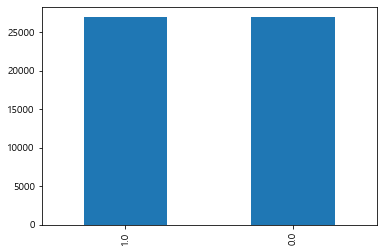

In [ ]:
print(y_resample['부도'].value_counts())
y_resample['부도'].value_counts().plot(kind = 'bar')

In [ ]:
X_resample['부도'] = y_resample['부도']
X_resample['부도'].value_counts()

1.0    26915
0.0    26915
Name: 부도, dtype: int64

In [ ]:
bankrupt_1

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA,부도
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.48,1.0
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.12,1.0
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.18,1.0
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,51.31,0.86,0.25,78081.78,1009.25,0.67,507.93,67.28,77.37,1.0


In [ ]:
from scipy import stats
bankrupt_0 = X_resample.loc[X_resample['부도']==0]
bankrupt_1 = X_resample.loc[X_resample['부도']==1]

ttest = stats.ttest_ind(bankrupt_0, bankrupt_1, equal_var = True)
print("Assuming equal variances : t-value = %.3f, p-value = %.3f" % ttest)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
a,b = stats.ttest_ind(bankrupt_0, bankrupt_1, equal_var = True)

In [ ]:
ttest_result = stats.ttest_ind(bankrupt_0['부도'], bankrupt_1['부도'], equal_var = True)

In [ ]:
ttest_result

Ttest_indResult(statistic=-inf, pvalue=0.0)

In [ ]:
ttest_result = stats.ttest_ind(bankrupt_0, bankrupt_1, equal_var = True)

In [ ]:
ttest_result

Ttest_indResult(statistic=array([-3.04343377e+01, -3.55018995e+01, -3.46198339e+01, -5.04934174e+01,
       -3.59149843e+01, -4.26988701e+01, -1.91795816e+01,  2.85752922e+01,
       -2.26783425e+01, -2.93533866e+01, -1.14334625e+01,  1.05258379e+01,
       -2.32227338e+01, -1.14813639e+01, -2.90325217e+01, -3.44199030e+00,
       -2.16415056e+01, -1.12506957e+01, -1.41030280e+01, -1.48062180e+00,
       -2.20305839e+01, -1.46351254e+01, -2.54045674e+01, -1.41632257e+01,
       -1.92746043e+01, -2.86305944e+01, -1.64892971e+01, -2.08229010e+01,
       -1.04269111e+01, -2.98915889e+00, -3.67842606e+00, -6.45564523e+00,
       -1.17222107e+01, -1.18577947e+01, -1.19312691e+00,  5.02419431e+00,
        1.49446517e+01, -9.04770480e+00,  2.37051218e+01,  1.48961460e+01,
        9.32544550e+00, -1.17867304e+01, -6.88839287e+00, -6.43903713e+00,
       -1.78320815e+01, -8.70940169e+00, -1.00000000e+00, -6.62354932e+01,
        8.92524903e+00,  2.82109951e+01,  5.63829322e-01, -5.64827100e+00,

In [ ]:
pd.DataFrame(b).astype(float)

,0
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
257,0.836
258,0.000
259,0.176
260,0.002


In [ ]:
t_test = pd.DataFrame([bankrupt_0.columns, a,b,c])

In [ ]:
t_test = t_test.rename(columns = t_test.iloc[0])
t_test = t_test.drop(t_test.index[0])

In [ ]:
, index={'2': 'p-value'} , index={'3': '유의수준'}, 

In [ ]:
t_test.rename(index={1: 't-value'}, inplace=True)
t_test.rename(index={2: 'p-value'}, inplace=True)
t_test.rename(index={3: '유의수준'}, inplace=True)

In [ ]:
t_testT = t_test.T

In [ ]:
t_testT

,t-value,p-value,유의수준
자산총계(요약),-30.43,1.001e-201,True
유동자산(요약),-35.5,6.643e-273,True
당좌자산(요약),-34.62,9.206e-260,True
현금 및 현금성자산(요약),-50.49,0.0,True
단기투자자산(요약),-35.91,3.627e-279,True
...,...,...,...
EBITDA/매출액,0.2068,0.8361,False
EBITDA/금융비용,-4.053,5.062e-05,True
EBITDA/평균발행주식수,-1.353,0.176,False
EV/EBITDA,3.08,0.002074,True


In [ ]:
t_testT[t_testT['유의수준']==False]

,t-value,p-value,유의수준
임대주택자산(요약),-1.481,0.1387,False
이연자산(요약),-1.193,0.2328,False
이연부채(요약),-1.0,0.3173,False
자본조정(요약),0.5638,0.5729,False
*법인세효과(요약),-1.048,0.2948,False
유형자산증가율,-0.5595,0.5758,False
재고자산증가율,-1.061,0.2887,False
매출액영업이익률,-1.242,0.2144,False
자본금영업이익률,0.8172,0.4138,False
자본금순이익률,0.01892,0.9849,False


In [ ]:
pd.options.display.float_format = '{: .4}'.format

array([-3.04343377e+01, -3.55018995e+01, -3.46198339e+01, -5.04934174e+01,
       -3.59149843e+01, -4.26988701e+01, -1.91795816e+01,  2.85752922e+01,
       -2.26783425e+01, -2.93533866e+01, -1.14334625e+01,  1.05258379e+01,
       -2.32227338e+01, -1.14813639e+01, -2.90325217e+01, -3.44199030e+00,
       -2.16415056e+01, -1.12506957e+01, -1.41030280e+01, -1.48062180e+00,
       -2.20305839e+01, -1.46351254e+01, -2.54045674e+01, -1.41632257e+01,
       -1.92746043e+01, -2.86305944e+01, -1.64892971e+01, -2.08229010e+01,
       -1.04269111e+01, -2.98915889e+00, -3.67842606e+00, -6.45564523e+00,
       -1.17222107e+01, -1.18577947e+01, -1.19312691e+00,  5.02419431e+00,
        1.49446517e+01, -9.04770480e+00,  2.37051218e+01,  1.48961460e+01,
        9.32544550e+00, -1.17867304e+01, -6.88839287e+00, -6.43903713e+00,
       -1.78320815e+01, -8.70940169e+00, -1.00000000e+00, -6.62354932e+01,
        8.92524903e+00,  2.82109951e+01,  5.63829322e-01, -5.64827100e+00,
       -1.17430056e+02, -

In [ ]:
b

array([1.00073017e-201, 6.64259074e-273, 9.20591932e-260, 0.00000000e+000,
       3.62717937e-279, 0.00000000e+000, 1.02829975e-081, 2.94513803e-178,
       2.49641171e-113, 6.60974385e-188, 3.08368151e-030, 6.95932114e-026,
       1.03189458e-118, 1.77628484e-030, 6.75307692e-184, 5.77889482e-004,
       2.02099928e-103, 2.47783795e-029, 4.37804439e-045, 1.38713236e-001,
       4.37110377e-107, 2.07775932e-048, 1.53939038e-141, 1.86780328e-045,
       1.66706050e-082, 6.18864587e-179, 6.18297247e-061, 6.42334606e-096,
       1.97593403e-025, 2.79872917e-003, 2.34906145e-004, 1.08672716e-010,
       1.07188055e-031, 2.15172795e-032, 2.32824934e-001, 5.07165284e-007,
       2.13074866e-050, 1.50729564e-019, 1.37703919e-123, 4.39481993e-050,
       1.14556809e-020, 5.00355596e-032, 5.70438892e-012, 1.21243268e-010,
       6.37750626e-071, 3.13968198e-018, 3.17315003e-001, 0.00000000e+000,
       4.58322378e-019, 7.95125699e-174, 5.72872643e-001, 1.62884826e-008,
       0.00000000e+000, 0

In [ ]:
c = b <= 0.05

In [ ]:
c

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,

In [ ]:
ttest

Ttest_indResult(statistic=array([-3.04343377e+01, -3.55018995e+01, -3.46198339e+01, -5.04934174e+01,
       -3.59149843e+01, -4.26988701e+01, -1.91795816e+01,  2.85752922e+01,
       -2.26783425e+01, -2.93533866e+01, -1.14334625e+01,  1.05258379e+01,
       -2.32227338e+01, -1.14813639e+01, -2.90325217e+01, -3.44199030e+00,
       -2.16415056e+01, -1.12506957e+01, -1.41030280e+01, -1.48062180e+00,
       -2.20305839e+01, -1.46351254e+01, -2.54045674e+01, -1.41632257e+01,
       -1.92746043e+01, -2.86305944e+01, -1.64892971e+01, -2.08229010e+01,
       -1.04269111e+01, -2.98915889e+00, -3.67842606e+00, -6.45564523e+00,
       -1.17222107e+01, -1.18577947e+01, -1.19312691e+00,  5.02419431e+00,
        1.49446517e+01, -9.04770480e+00,  2.37051218e+01,  1.48961460e+01,
        9.32544550e+00, -1.17867304e+01, -6.88839287e+00, -6.43903713e+00,
       -1.78320815e+01, -8.70940169e+00, -1.00000000e+00, -6.62354932e+01,
        8.92524903e+00,  2.82109951e+01,  5.63829322e-01, -5.64827100e+00,